In [2]:
import numpy as np
import pandas as pd
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)


NumPy version: 2.1.1
Pandas version: 2.2.2


In [3]:
file_path319 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris319.pkl'
file_path320 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris320.pkl'
file_path321 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris321.pkl'
file_path332 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris332.pkl'

df319 = pd.read_pickle(file_path319)
df320 = pd.read_pickle(file_path320)
df321 = pd.read_pickle(file_path321)
df332 = pd.read_pickle(file_path332)

In [ ]:
df319[]

In [4]:
import matplotlib.pyplot as plt

# Path 
base_path = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights'

# Filenames of the .pkl files
filenames = ['paris320.pkl', 'paris321.pkl', 'paris332.pkl', 'paris319.pkl']
aircraft_data = {}

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Check to understand its structure
print(aircraft_data['paris320.pkl'].head())

             time  timestep  maxtimestep  icao24  callsign  baroaltitude  \
42370  1504243154         0          855    3005     16134     76.745728   
42371  1504243169        15          855    3005     16134    290.103178   
42372  1504243184        30          855    3005     16134    480.182287   
42373  1504243199        45          855    3005     16134    663.260311   
42374  1504243214        60          855    3005     16134    838.474595   

             lat       lon   velocity  vertratecorr  segment  modeltype  \
42370  48.726600  2.335462  82.159783     12.447698   851602          2   
42371  48.721148  2.319979  77.778677     13.329920   851602          2   
42372  48.716403  2.305822  78.690429     11.054080   851602          2   
42373  48.711676  2.291404  79.839233     11.704320   851602          2   
42374  48.705767  2.277311  80.342230     11.881091   851602          2   

       operator  fromICAO  toICAO  distance_from_dep  trip_distance  \
42370        24      

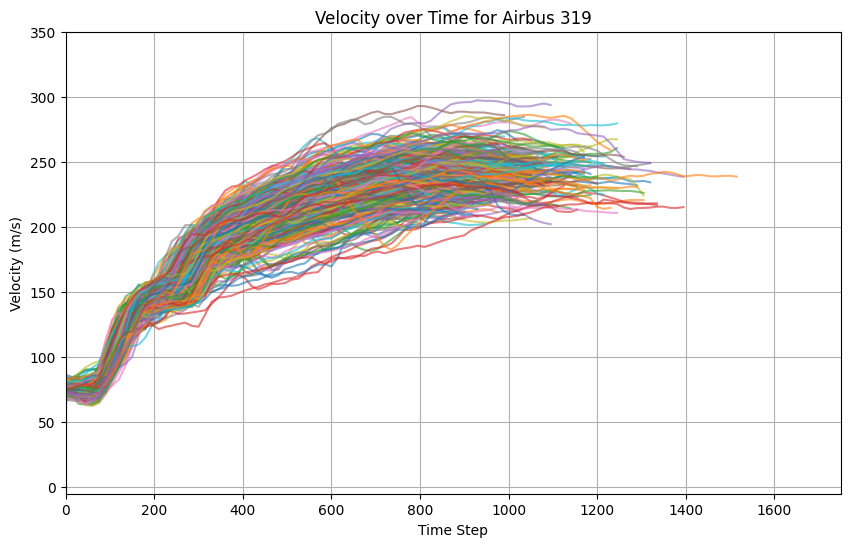

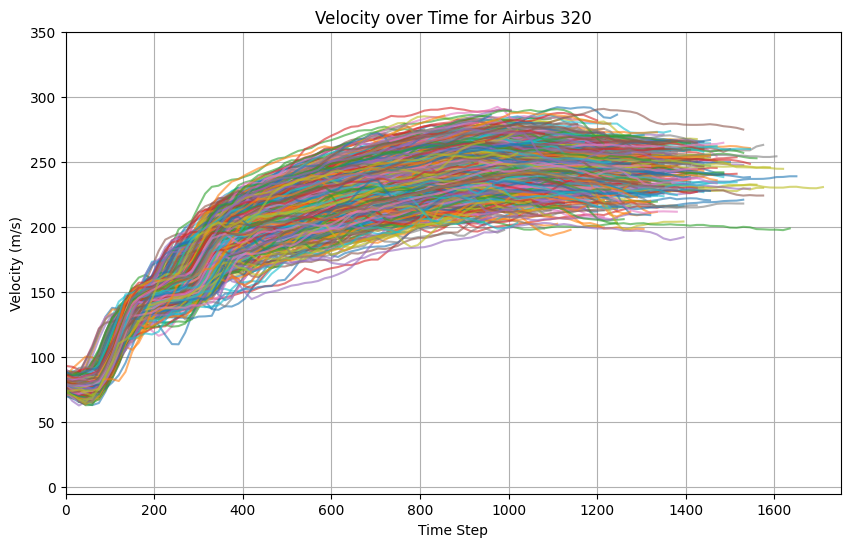

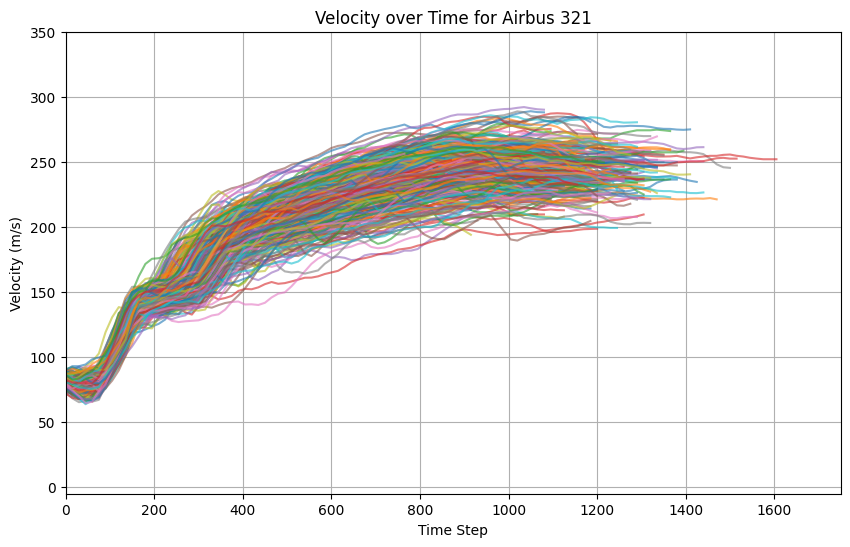

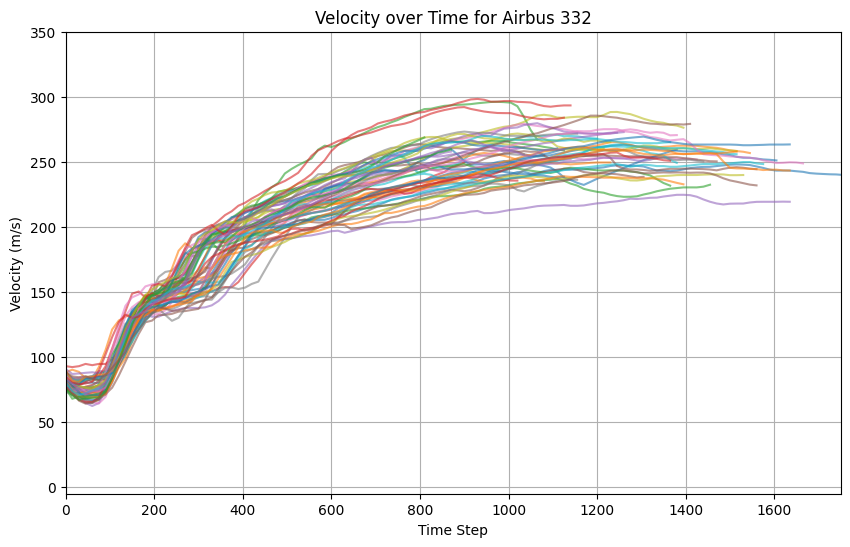

In [5]:
# Function to plot velocity over time
def plot_velocity(df, aircraft_model, xlims, ylims):
    plt.figure(figsize=(10, 6))
    for segment, group in df.groupby('segment'):
        plt.plot(group['timestep'], group['velocity'], label=f'Segment {segment}', alpha=0.6)
    plt.title(f'Velocity over Time for {aircraft_model}')
    plt.xlabel('Time Step')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.show()

# Define x and y limits
x_limits = (0, 1750)  
y_limits = (-5, 350)

# Plot for each aircraft
plot_velocity(df319, 'Airbus 319', x_limits, y_limits)
plot_velocity(df320, 'Airbus 320', x_limits, y_limits)
plot_velocity(df321, 'Airbus 321', x_limits, y_limits)
plot_velocity(df332, 'Airbus 332', x_limits, y_limits)

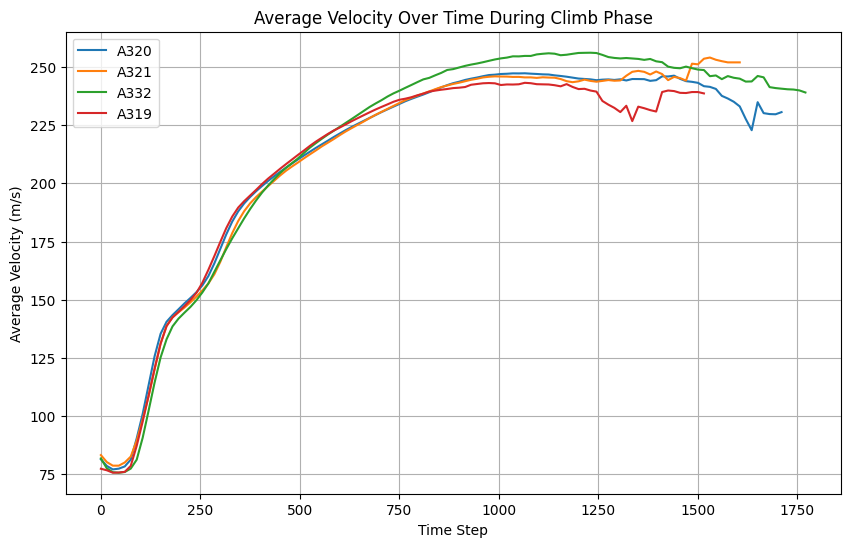

In [6]:
# Path
base_path = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights'

# Filenames of the files
filenames = ['paris320.pkl', 'paris321.pkl', 'paris332.pkl', 'paris319.pkl']
aircraft_data = {}
airplane_models = ['A320', 'A321', 'A332', 'A319']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    df = aircraft_data[file]
    average_velocity = df.groupby('timestep')['velocity'].mean()  # Calculate average velocity over time
    
    # Plotting
    plt.plot(average_velocity, label=model.replace('.pkl', ''))  # Clean up model name for the label

plt.title('Average Velocity Over Time During Climb Phase')
plt.xlabel('Time Step')
plt.ylabel('Average Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()
